## CPSC 390 - AI
# Project_1_Search

Name: Asiyah Speight

Team member: Chantelle Chan

Tasks:

(1) Implement a breadth-first search and a depth-first search to find a path from Arad to Bucharest in the Romania roadmap (Figure 1). Print the nodes expanded and the frontier at each step of the search process. The node should be formatted as “Parent_city->Current_city(Path_cost)”. When the solution is found, print the solution path and the total path cost;

(2) Implement the A* search using the heuristic function in Fig. 2 with the same output requirements, except that the nodes should be formatted as “Parent_city->Current_cit (Path_cost, Estimated_total_cost)”.

(3) Extra credit: collect relevant performance information and compare the time and space usage and cost optimality among the three algorithms for the Romania road map search. Provide a brief discussion of your findings.

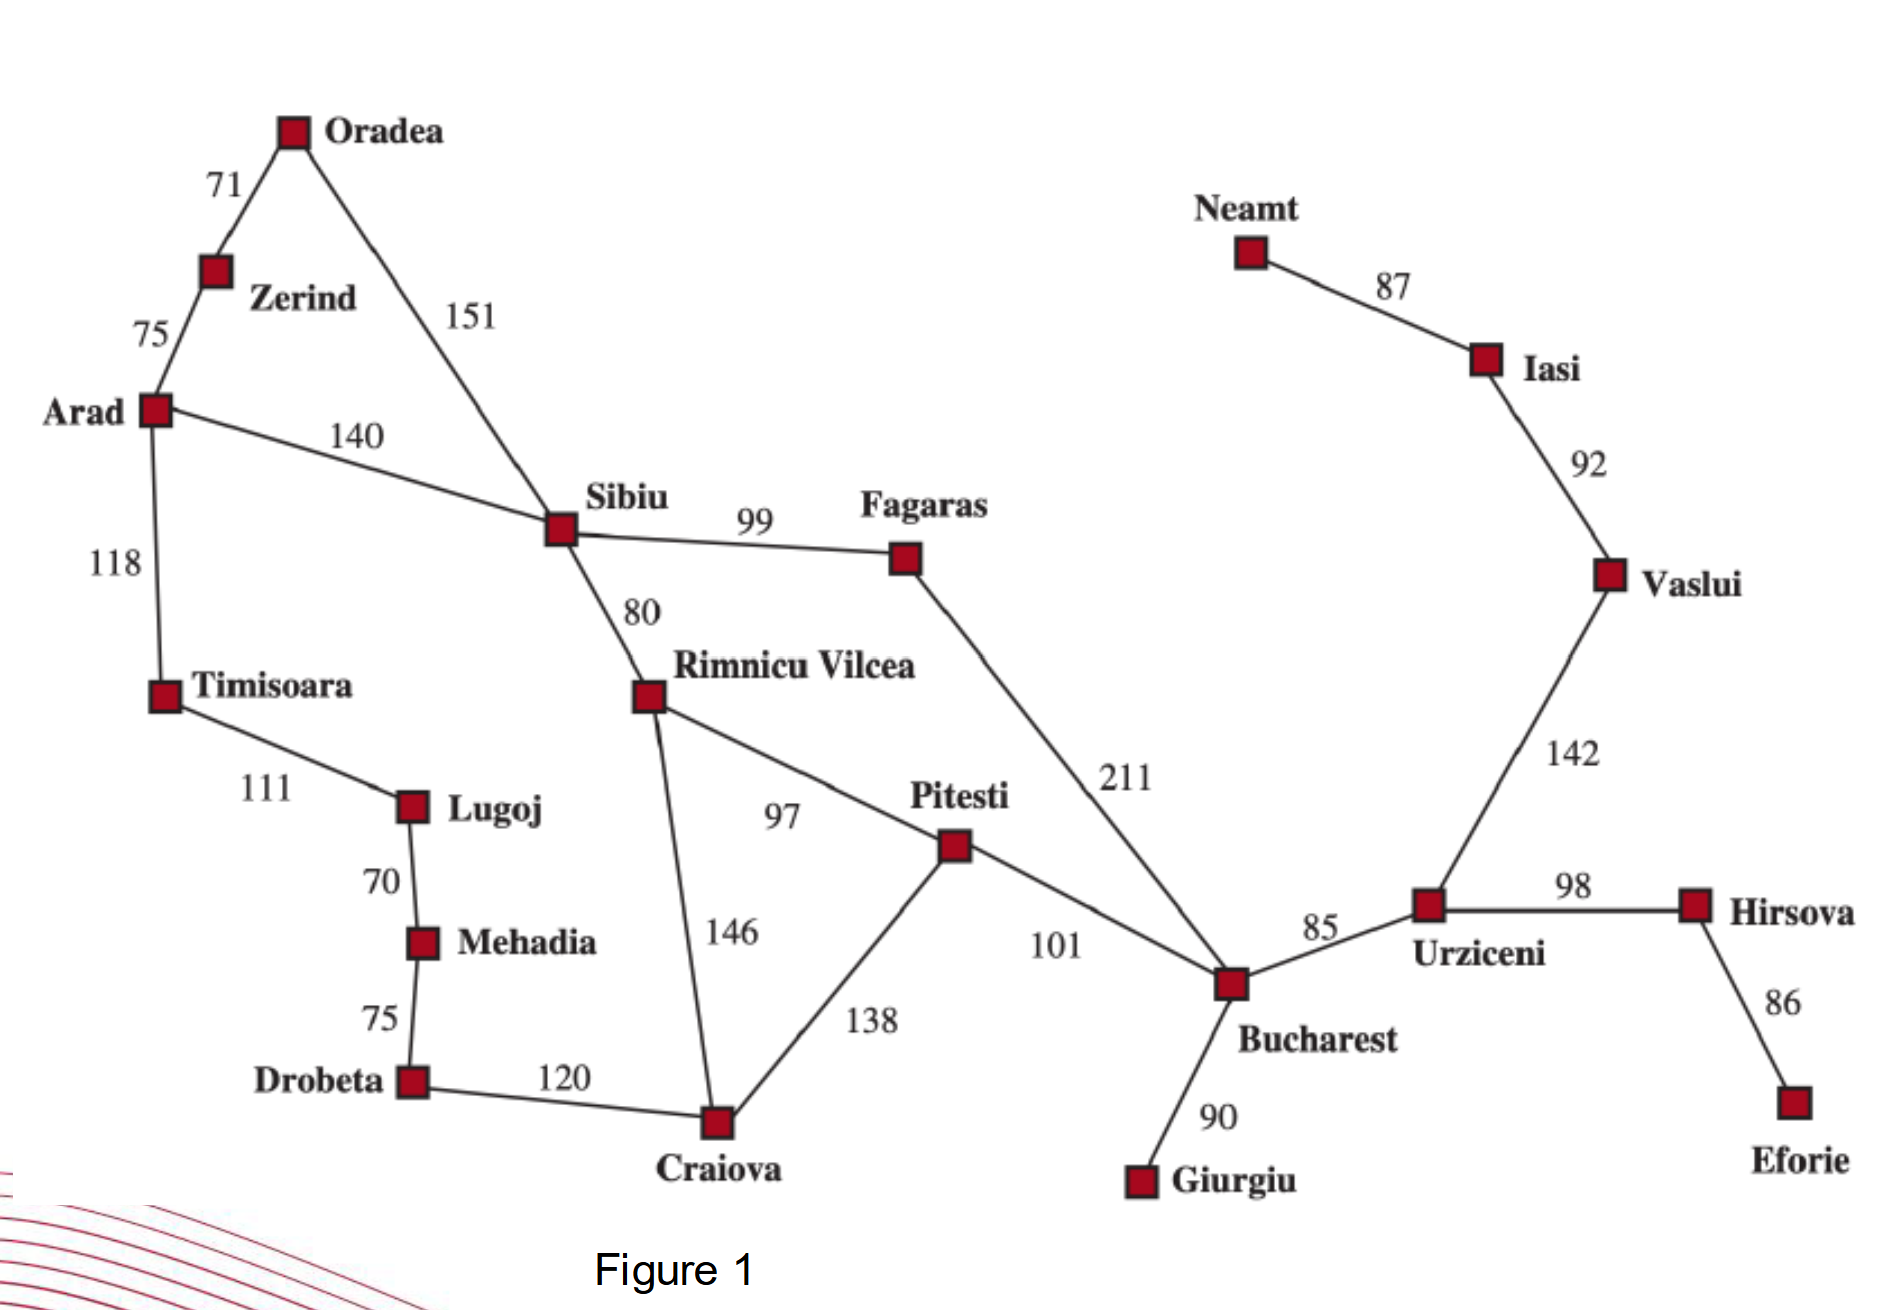

### The following code snippet uses a dictionary of dictionaries to encode the Romania roadmap and demonstrates how to get the elements.

In [6]:
roadmap = dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Craiova=120, Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Bucharest=211, Sibiu=99),
    Giurgiu=dict(Bucharest=90),
    Hirsova=dict(Eforie=86, Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Mehadia=dict(Lugoj=70, Drobeta=75),
    Neamt=dict(Iasi=87),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Bucharest=101, Rimnicu=97, Craiova=138),
    Rimnicu=dict(Craiova=146, Sibiu=80, Pitesti=97),
    Sibiu=dict(Arad=140, Fagaras=99, Oradea=151, Rimnicu=80),
    Timisoara=dict(Arad=118,Lugoj=111),
    Vaslui=dict(Iasi=92, Urziceni=98),
    Urziceni=dict(Vaslui=142, Bucharest=85, Hirsova=98),
    Zerind=dict(Arad=75, Oradea=71))

# Demonstration of how to use this data structure
#  by printing the map elements and performing a sanity check -
# Please remove or comment out this section in your final submission
for city, neighbors in roadmap.items():
  print(city, neighbors)
  for next_city, distance in neighbors.items():
    print("  The distance from %s to %s is %d" % (city, next_city, distance))
    if next_city not in roadmap:
      print(" ----- ERROR! %s is not in the city node list -----" % next_city)

Arad {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}
  The distance from Arad to Zerind is 75
  The distance from Arad to Sibiu is 140
  The distance from Arad to Timisoara is 118
Bucharest {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211}
  The distance from Bucharest to Urziceni is 85
  The distance from Bucharest to Pitesti is 101
  The distance from Bucharest to Giurgiu is 90
  The distance from Bucharest to Fagaras is 211
Craiova {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138}
  The distance from Craiova to Drobeta is 120
  The distance from Craiova to Rimnicu is 146
  The distance from Craiova to Pitesti is 138
Drobeta {'Craiova': 120, 'Mehadia': 75}
  The distance from Drobeta to Craiova is 120
  The distance from Drobeta to Mehadia is 75
Eforie {'Hirsova': 86}
  The distance from Eforie to Hirsova is 86
Fagaras {'Bucharest': 211, 'Sibiu': 99}
  The distance from Fagaras to Bucharest is 211
  The distance from Fagaras to Sibiu is 99
Giurgiu {'Bucharest': 90}
  The 

**Your code starts below.  Please organized them in multiple cells with a formatted text cell before each code cell to explain the purpose of the code cell**

** MY CODE**

### (1) 

#### Implement a breadth-first search and a depth-first search to find a path from Arad to Bucharest in the Romania roadmap (Figure 1). Print the nodes expanded and the frontier at each step of the search process. The node should be formatted as “Parent_city->Current_city(Path_cost)”. When the solution is found, print the solution path and the total path cost.

In [16]:
# The Romania map represented as a dictionary of dictionaries.
# Each city has neighbors with the distance (edge cost) between them.

roadmap = dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Craiova=120, Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Bucharest=211, Sibiu=99),
    Giurgiu=dict(Bucharest=90),
    Hirsova=dict(Eforie=86, Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Mehadia=dict(Lugoj=70, Drobeta=75),
    Neamt=dict(Iasi=87),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Bucharest=101, Rimnicu=97, Craiova=138),
    Rimnicu=dict(Craiova=146, Sibiu=80, Pitesti=97),
    Sibiu=dict(Arad=140, Fagaras=99, Oradea=151, Rimnicu=80),
    Timisoara=dict(Arad=118,Lugoj=111),
    Vaslui=dict(Iasi=92, Urziceni=98),
    Urziceni=dict(Vaslui=142, Bucharest=85, Hirsova=98),
    Zerind=dict(Arad=75, Oradea=71))

# BFS
The below cell implements Breadth-First Search (BFS) on the roadmap graph.
It uses a queue to explore cities level by level and keeps track of parent cities to reconstruct the solution path.
Each node expansion and the final path are printed in the same format as DFS for consistency.

Expand shallowest unexpanded node.
• Implementation:
• frontier is a FIFO queue, i.e., new nodes go at end (First In First Out queue.)


In [10]:
start_city = "Arad"
goal_city = "Bucharest"

In [17]:
from collections import deque

def bfs(roadmap, start, goal):
    # queue holds (parent, current, cost_from_start)
    frontier_queue = deque()
    frontier_queue.append((None, start, 0))

    visited = set()          # mark expanded nodes
    parent_tracker = {}      # remember how we got to each city
    cost_tracker = {start: 0}

    while frontier_queue:
        parent, current, cost_so_far = frontier_queue.popleft()

        # print the node being expanded
        if parent is None:
            print(f"{current}(0)")
        else:
            print(f"{parent}->{current}({cost_so_far})")

        # check if goal found
        if current == goal:
            # rebuild solution path
            path = []
            node = current
            while node is not None:
                path.append(node)
                node = parent_tracker.get(node)
            path.reverse()

            print("Solution path:", " -> ".join(path))
            print("Total path cost:", cost_so_far)
            return

        # mark as visited
        visited.add(current)

        # add neighbors to frontier
        next_frontier = []
        for neighbor, dist in roadmap[current].items():
            if neighbor not in visited and neighbor not in [n[1] for n in frontier_queue]:
                new_cost = cost_so_far + dist
                frontier_queue.append((current, neighbor, new_cost))
                parent_tracker[neighbor] = current
                cost_tracker[neighbor] = new_cost
                next_frontier.append(f"{current}->{neighbor}({new_cost})")

        if next_frontier:
            print("Frontier:", ", ".join(next_frontier))

    print("No path found.")

# Run BFS
start_city = "Arad"
goal_city = "Bucharest"
bfs(roadmap, start_city, goal_city)



Arad(0)
Frontier: Arad->Zerind(75), Arad->Sibiu(140), Arad->Timisoara(118)
Arad->Zerind(75)
Frontier: Zerind->Oradea(146)
Arad->Sibiu(140)
Frontier: Sibiu->Fagaras(239), Sibiu->Rimnicu(220)
Arad->Timisoara(118)
Frontier: Timisoara->Lugoj(229)
Zerind->Oradea(146)
Sibiu->Fagaras(239)
Frontier: Fagaras->Bucharest(450)
Sibiu->Rimnicu(220)
Frontier: Rimnicu->Craiova(366), Rimnicu->Pitesti(317)
Timisoara->Lugoj(229)
Frontier: Lugoj->Mehadia(299)
Fagaras->Bucharest(450)
Solution path: Arad -> Sibiu -> Fagaras -> Bucharest
Total path cost: 450


1. **Start at Arad (0)**  
   - The frontier is initialized with Arad’s neighbors: Zerind (75), Sibiu (140), and Timisoara (118).  

2. **Expand Zerind (75)**  
   - Oradea is found to be at cost 146.  

3. **Expand Sibiu (140)**  
   - New neighbors found: Fagaras (239) and Rimnicu (220).  

4. **Expand Timisoara (118)**  
   - New neighbor Lugoj (229) is added.  

5. **Expand Oradea (146)**  
   - No new nodes are added (its neighbors were already visited or in the frontier).  

6. **Expand Fagaras (239)**  
   - Discovers Bucharest at cost 450. Bucharest is added to the frontier.  

7. **Expand Rimnicu (220)**  
   - New neighbors discovered: Craiova (366) and Pitesti (317).  

8. **Expand Lugoj (229)**  
   - New neighbor Mehadia (299) is added.  

9. **Expand Fagaras → Bucharest (450)**  
   - The goal is reached. The algorithm reconstructs the path:  
     **Arad → Sibiu → Fagaras → Bucharest**  
   - Total path cost is **450**.

--- 

**How to trace the path in a Breadth-First Search?**
*Shows BFS in Python, maintaining a parent dictionary for path reconstruction.*
https://stackoverflow.com/questions/8922060/how-to-trace-the-path-in-a-breadth-first-search

**Breadth first search implementation in Python**
*Discusses implementing BFS, how to record bfs_visited, reconstruct path, etc.*
https://stackoverflow.com/questions/10154362/breadth-first-search-implementation-in-python/10154435#10154435

*BFS implementation: queue vs storing previous and next frontier (CS.SE)*
**Talks about BFS and storing frontier levels etc. Might be helpful for understanding frontier printing.**
https://cs.stackexchange.com/questions/65292/bfs-implementation-queue-vs-storing-previous-and-next-frontier

*Breadth First Search Path Finding – Store Paths in Queue or Track Predecessors*
**Compares two approaches for path finding with BFS: storing full paths in the queue vs tracking predecessors (bfs_parents) like your code should do.**
https://cs.stackexchange.com/questions/120099/breadth-first-search-path-finding-store-paths-in-queue-or-track-predecessors

*Breadth-First-Search (BFS) in Python for Path Traversed and Shortest Path Taken*
https://stackoverflow.com/questions/77539424/breadth-first-search-bfs-in-python-for-path-traversed-and-shortest-path-taken

*Breadth First Search or BFS for a Graph in Python*
https://www.geeksforgeeks.org/python/python-program-for-breadth-first-search-or-bfs-for-a-graph/

*Breadth First Search in Python (with Code) | BFS Algorithm*
https://favtutor.com/blogs/breadth-first-search-python


## DFS

The below cell implements Depth-First Search (DFS) on the roadmap graph.
It uses a stack to keep track of cities to explore and records parent cities for reconstructing the solution path.
The expanded nodes and the solution path are printed in the requested format.

Purpose
- Expand deepest unexpanded node
- implementaition:
    - frontier = LIFO (stack)
        - Last in first out

In [9]:
roadmap

{'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
 'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
 'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
 'Drobeta': {'Craiova': 120, 'Mehadia': 75},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Bucharest': 211, 'Sibiu': 99},
 'Giurgiu': {'Bucharest': 90},
 'Hirsova': {'Eforie': 86, 'Urziceni': 98},
 'Iasi': {'Vaslui': 92, 'Neamt': 87},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
 'Neamt': {'Iasi': 87},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Bucharest': 101, 'Rimnicu': 97, 'Craiova': 138},
 'Rimnicu': {'Craiova': 146, 'Sibiu': 80, 'Pitesti': 97},
 'Sibiu': {'Arad': 140, 'Fagaras': 99, 'Oradea': 151, 'Rimnicu': 80},
 'Timisoara': {'Arad': 118, 'Lugoj': 111},
 'Vaslui': {'Iasi': 92, 'Urziceni': 98},
 'Urziceni': {'Vaslui': 142, 'Bucharest': 85, 'Hirsova': 98},
 'Zerind': {'Arad': 75, 'Oradea': 71}}

In [10]:
#DFS implementation
from collections import deque

start_city = "Arad"
goal_city = "Bucharest"

def dfs(roadmap, start, goal):
    # stack holds (parent, current, total_cost_from_start)
    frontier_stack = deque()
    frontier_stack.append((None, start, 0))

    visited = {}
    parent_tracker = {}
    cost_tracker = {start: 0}

    while frontier_stack:
        parent, current, cost_so_far = frontier_stack.pop()

        # print expanded node
        if parent is None:
            print(f"{current}(0)")
        else:
            print(f"{parent} -> {current}({cost_so_far})")

        # goal check
        if current == goal:
            path = []
            node = current
            while node is not None:
                path.append(node)
                node = parent_tracker.get(node)
            path.reverse()

            print("Solution path:", " -> ".join(path))
            print("Total path cost:", cost_so_far)
            return

        visited[current] = True

        # push neighbors onto the stack (sort so expansion order is consistent)
        neighbors = list(roadmap[current].items())
        neighbors.sort(reverse=True)   # ensures order doesn’t flip each run
        new_frontier = []
        for neighbor, dist in neighbors:
            if neighbor not in visited and all(neighbor != n[1] for n in frontier_stack):
                new_cost = cost_so_far + dist
                frontier_stack.append((current, neighbor, new_cost))
                parent_tracker[neighbor] = current
                cost_tracker[neighbor] = new_cost
                new_frontier.append(f"{current} -> {neighbor}({new_cost})")

        if new_frontier:
            print("DFS Frontier:", ", ".join(new_frontier))

    print("No path found.")
    
# run DFS
dfs(roadmap, start_city, goal_city)

Arad(0)
DFS Frontier: Arad -> Zerind(75), Arad -> Timisoara(118), Arad -> Sibiu(140)
Arad -> Sibiu(140)
DFS Frontier: Sibiu -> Rimnicu(220), Sibiu -> Oradea(291), Sibiu -> Fagaras(239)
Sibiu -> Fagaras(239)
DFS Frontier: Fagaras -> Bucharest(450)
Fagaras -> Bucharest(450)
Solution path: Arad -> Sibiu -> Fagaras -> Bucharest
Total path cost: 450


We start at the initial city **Arad(0)**. From here, Depth-First Search (DFS) expands the neighbors in order, pushing paths onto the frontier stack.

1. **Step 1: Initial Expansion**
   - Current node: **Arad**
   - Frontier after expansion:
     - Arad -> Zerind(75)
     - Arad -> Timisoara(118)
     - Arad -> Sibiu(140)

2. **Step 2: Explore Sibiu**
   - DFS follows LIFO, so we expand:
     - Arad -> Sibiu(140)
   - Frontier after expansion:
     - Sibiu -> Rimnicu(220)
     - Sibiu -> Oradea(291)
     - Sibiu -> Fagaras(239)

3. **Step 3: Explore Fagaras**
   - going deeper and expanding:
     - Sibiu -> Fagaras(239)
   - Frontier after expansion:
     - Fagaras -> Bucharest(450)

4. **Step 4: Reach Bucharest**
   - Expanding Fagaras leads us directly to the goal:
     - Fagaras -> Bucharest(450)

**Solution Path:**  
Arad -> Sibiu -> Fagaras -> Bucharest

**Total Path Cost:**  
450

(2) Implement the A* search using the heuristic function in Fig. 2 with the same output requirements, except that the nodes should be formatted as “Parent_city->Current_city(Path_cost, Estimated_total_cost)”.

## A* Search

the below cell initializes the A* search by setting up the frontier and the start node. It also defines the data structures to keep track of explored cities and their parents.

- Idea: avoid expanding paths that look expensive overall
- The evaluation function f(n) is the estimated total cost of the path through node n to the goal: f(n) = g(n) + h(n)
    - g(n): cost so far to reach n (path cost)
    - h(n): estimated cost from n to goal (heuristic)
    - f(n): estimated total cost of path through n to goal

In [11]:
#the naming of the graph is similar to my partners part the code is different

heuristic = dict(
    Arad= 366,
    Bucharest = 0,
    Craiova = 160,
    Drobeta = 242,
    Eforie = 161,
    Fagaras = 176,
    Giurgiu = 77,
    Hirsova = 151,
    Iasi = 226,
    Lugoj = 244,
    Mehadia=241,
    Neamt=234,
    Oradea=380,
    Pitesti=100,
    Rimnicu=193,
    Sibiu=253,
    Timisoara=329,
    Vaslui=199,
    Urziceni=80,
    Zerind=374)

In [12]:
# A* search

import heapq

start_city = "Arad"
goal_city = "Bucharest"

def a_star(roadmap, start, goal, heuristic):
    frontier = []
    start_node = (heuristic[start], start, None, 0)  # f, state, parent, g
    heapq.heappush(frontier, start_node)

    explored = {}
    parent_tracker = {}

    while frontier:
        f, state, parent, g = heapq.heappop(frontier)

        # Record parent before goal check to reconstruct full path
        explored[state] = g
        parent_tracker[state] = parent

        # Print expanded node in required format
        if parent is None:
            print(f"{state}({g}, {f})")
        else:
            print(f"{parent}->{state}({g}, {f})")

        # Goal test
        if state == goal:
            path = []
            node = state
            while node is not None:
                path.append(node)
                node = parent_tracker.get(node)
            path.reverse()
            print("Solution path:", " -> ".join(path))
            print("Total path cost:", g)
            return

        # Expand neighbors
        next_frontier = []
        for neighbor, distance in roadmap[state].items():
            g_new = g + distance
            f_new = g_new + heuristic[neighbor]

            if neighbor not in explored or g_new < explored[neighbor]:
                heapq.heappush(frontier, (f_new, neighbor, state, g_new))
                next_frontier.append(f"{state}->{neighbor}({g_new}, {f_new})")

        if next_frontier:
            print("Frontier:", ", ".join(next_frontier))


# Run A* search
a_star(roadmap, start_city, goal_city, heuristic)

Arad(0, 366)
Frontier: Arad->Zerind(75, 449), Arad->Sibiu(140, 393), Arad->Timisoara(118, 447)
Arad->Sibiu(140, 393)
Frontier: Sibiu->Fagaras(239, 415), Sibiu->Oradea(291, 671), Sibiu->Rimnicu(220, 413)
Sibiu->Rimnicu(220, 413)
Frontier: Rimnicu->Craiova(366, 526), Rimnicu->Pitesti(317, 417)
Sibiu->Fagaras(239, 415)
Frontier: Fagaras->Bucharest(450, 450)
Rimnicu->Pitesti(317, 417)
Frontier: Pitesti->Bucharest(418, 418), Pitesti->Craiova(455, 615)
Pitesti->Bucharest(418, 418)
Solution path: Arad -> Sibiu -> Rimnicu -> Pitesti -> Bucharest
Total path cost: 418


**Extra Credit - algorithm analysis**

(3) Extra credit: collect relevant performance information and compare the time and space usage and cost optimality among the three algorithms for the Romania road map search. Provide a brief discussion of your findings.

In [16]:
import time
from collections import deque
import heapq

def reconstruct_path(came_from, start, goal):
    """
    Helper: Rebuilds the path from start to goal using the 'came_from' dictionary.
    """
    path = []
    node = goal
    while node != start:
        path.append(node)
        node = came_from[node]
    path.append(start)
    return list(reversed(path))

def path_cost_from_path(roadmap, path):
    """
    Helper: Computes the total path cost (sum of edge weights) given a path list.
    """
    cost = 0
    for a, b in zip(path, path[1:]):   # iterate through pairs
        cost += roadmap[a][b]
    return cost

def instrumented_bfs(roadmap, start, goal):
    """
    Breadth-First Search (BFS) instrumented to measure time, nodes expanded, memory, and cost.
    """
    t0 = time.perf_counter()                # start timer
    frontier = deque([start])               # frontier queue (FIFO)
    came_from = {}                          # tracks parents to rebuild path
    explored = set()                        # visited nodes
    nodes_expanded = 0
    max_frontier = 1                        # track memory usage
    max_explored = 0

    while frontier:
        current = frontier.popleft()        # expand the leftmost node
        nodes_expanded += 1

        # goal test
        if current == goal:
            t1 = time.perf_counter()
            path = reconstruct_path(came_from, start, goal)
            return {
                "path": path,
                "cost": path_cost_from_path(roadmap, path),
                "time": t1 - t0,
                "nodes_expanded": nodes_expanded,
                "max_frontier": max_frontier,
                "max_explored": max_explored,
                "combined_max": max_frontier + max_explored,
            }

        explored.add(current)

        # add unexplored neighbors to frontier
        for neighbor in roadmap[current]:
            if neighbor not in explored and neighbor not in frontier and neighbor not in came_from:
                came_from[neighbor] = current
                frontier.append(neighbor)

        # update memory usage tracking
        max_frontier = max(max_frontier, len(frontier))
        max_explored = max(max_explored, len(explored))

    return None   # no solution found

def instrumented_dfs(roadmap, start, goal):
    """
    Depth-First Search (DFS) instrumented to measure time, nodes expanded, memory, and cost.
    """
    t0 = time.perf_counter()
    frontier = [start]                      # frontier stack (LIFO)
    came_from = {}
    explored = set()
    nodes_expanded = 0
    max_frontier = 1
    max_explored = 0

    while frontier:
        current = frontier.pop()            # expand the last node pushed
        nodes_expanded += 1

        if current == goal:                 # goal test
            t1 = time.perf_counter()
            path = reconstruct_path(came_from, start, goal)
            return {
                "path": path,
                "cost": path_cost_from_path(roadmap, path),
                "time": t1 - t0,
                "nodes_expanded": nodes_expanded,
                "max_frontier": max_frontier,
                "max_explored": max_explored,
                "combined_max": max_frontier + max_explored,
            }

        if current not in explored:
            explored.add(current)
            # push neighbors in reverse order to keep expansion consistent
            for neighbor in reversed(list(roadmap[current].keys())):
                if neighbor not in explored and neighbor not in frontier and neighbor not in came_from:
                    came_from[neighbor] = current
                    frontier.append(neighbor)

        max_frontier = max(max_frontier, len(frontier))
        max_explored = max(max_explored, len(explored))

    return None

def instrumented_a_star(roadmap, start, goal, heuristic):
    """
    A* Search using a priority queue. Instrumented for time, nodes, memory, and cost.
    """
    t0 = time.perf_counter()
    heap = []                               # frontier = priority queue (min-heap)
    entry_g = {}                            # best g-costs found
    came_from = {}                          # parent links
    explored = set()
    nodes_expanded = 0
    max_frontier = 0
    max_explored = 0

    g_start = 0
    f_start = g_start + heuristic.get(start, 0)
    heapq.heappush(heap, (f_start, g_start, start))
    entry_g[start] = 0

    while heap:
        f_cur, g_cur, current = heapq.heappop(heap)
        nodes_expanded += 1

        # ignore outdated entries in heap
        if g_cur != entry_g.get(current, float('inf')):
            continue

        if current == goal:                 # goal test
            t1 = time.perf_counter()
            path = reconstruct_path(came_from, start, goal)
            return {
                "path": path,
                "cost": path_cost_from_path(roadmap, path),
                "time": t1 - t0,
                "nodes_expanded": nodes_expanded,
                "max_frontier": max_frontier,
                "max_explored": max_explored,
                "combined_max": max_frontier + max_explored,
            }

        explored.add(current)

        for neighbor, w in roadmap[current].items():
            tentative_g = g_cur + w
            if tentative_g < entry_g.get(neighbor, float('inf')):
                came_from[neighbor] = current
                entry_g[neighbor] = tentative_g
                f_neighbor = tentative_g + heuristic.get(neighbor, 0)
                heapq.heappush(heap, (f_neighbor, tentative_g, neighbor))

        max_frontier = max(max_frontier, len(heap))
        max_explored = max(max_explored, len(explored))

    return None

import pandas as pd

def run_experiments(roadmap, heuristic, pairs):
    """
    Runs BFS, DFS, and A* for each (start, goal) pair and collects results.
    Returns a pandas DataFrame.
    """
    results = []
    for start, goal in pairs:
        bfs_result = instrumented_bfs(roadmap, start, goal)
        dfs_result = instrumented_dfs(roadmap, start, goal)
        astar_result = instrumented_a_star(roadmap, start, goal, heuristic)
        results.append({
            "start": start,
            "goal": goal,
            "BFS_cost": bfs_result["cost"] if bfs_result else None,
            "BFS_time": bfs_result["time"] if bfs_result else None,
            "DFS_cost": dfs_result["cost"] if dfs_result else None,
            "DFS_time": dfs_result["time"] if dfs_result else None,
            "A*_cost": astar_result["cost"] if astar_result else None,
            "A*_time": astar_result["time"] if astar_result else None,
        })
    return pd.DataFrame(results)

pairs = [
    ("Oradea", "Bucharest"),
    ("Craiova", "Iasi"),
    ("Eforie", "Arad"), 
    ("Arad", "Bucharest"),
    ("Sibiu", "Bucharest"),
    ("Timisoara", "Bucharest")
]

df_results = run_experiments(roadmap, heuristic, pairs)
df_results


,start,goal,BFS_cost,BFS_time,DFS_cost,DFS_time,A*_cost,A*_time
0,Oradea,Bucharest,461,0.000016,879,0.000024,429,0.000018
1,Craiova,Iasi,558,0.000014,1263,0.000015,558,0.000031
2,Eforie,Arad,719,0.000014,687,0.000021,687,0.000050
3,Arad,Bucharest,450,0.000010,450,0.000007,418,0.000012
4,Sibiu,Bucharest,310,0.000006,873,0.000010,278,0.000009
5,Timisoara,Bucharest,568,0.000023,568,0.000007,536,0.000020


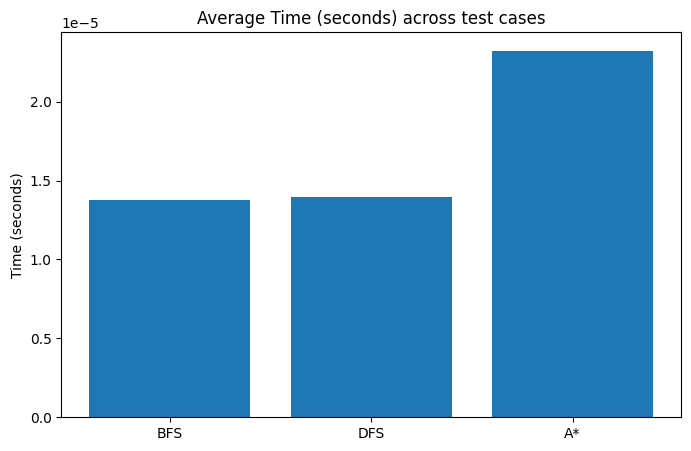

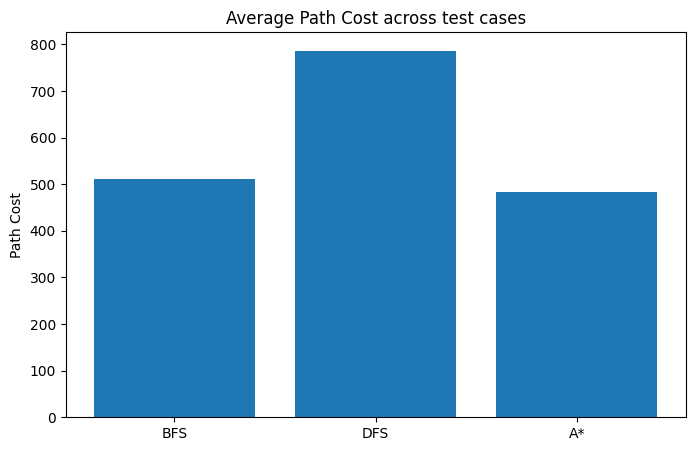

In [ ]:
import matplotlib.pyplot as plt

def plot_metric(df, metric_prefix, metric_label):
    plt.figure(figsize=(8,5))
    algos = ["BFS", "DFS", "A*"]
    means = []
    for algo in algos:
        col = f"{algo}_{metric_prefix}"
        if col in df.columns:
            means.append(df[col].mean())
        else:
            means.append(0)  # Use 0 if column is missing
    plt.bar(algos, means)
    plt.ylabel(metric_label)
    plt.title(f"Average {metric_label} across test cases")
    plt.show()

plot_metric(df_results, "time", "Time (seconds)")
plot_metric(df_results, "cost", "Path Cost")